In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import statistics
import scipy.stats as sp
from sklearn import linear_model

In [ ]:
!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Read the raw data

In [ ]:
url = 'https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv'

In [ ]:
data_raw = pd.read_csv(url)
data_raw.shape

(65276, 25)

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [ ]:
# rename some clumns 
data_raw.rename(columns={'Perceived_Race':'race', 'Age_group__at_arrest_':'age_group', 'Youth_at_arrest__under_18_years':'youth'}, 
                inplace = True)

In [ ]:
data_raw.describe()

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,65276.000000,6.527600e+04,6.480700e+04,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,65276.000000
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423
min,2020.000000,1.000000e+06,6.000000e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015001e+06,6.016202e+06,309215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16319.750000
50%,2021.000000,1.030006e+06,6.032402e+06,318595.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32638.500000
75%,2021.000000,1.044996e+06,6.048602e+06,327926.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48957.250000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


In [ ]:
categorical = data_raw.dtypes[data_raw.dtypes == "object"].index
print(categorical)

data_raw[categorical].describe()

Index(['Arrest_Month', 'race', 'Sex', 'age_group', 'youth', 'ArrestLocDiv',
       'Occurrence_Category'],
      dtype='object')


,Arrest_Month,race,Sex,age_group,youth,ArrestLocDiv,Occurrence_Category
count,65276,65272,65276,65252,65276,65276,65111
unique,4,8,3,9,3,18,31
top,Jan-Mar,White,M,Aged 25 to 34 years,Not a youth,XX,Assault
freq,17613,27723,52650,20949,62234,29646,7726


In [ ]:
data_raw.isnull().sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
race                                   4
Sex                                    0
age_group                             24
youth                                  0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [ ]:
# inplace the missing value with unknown
data_raw['race'].fillna('Unknown or Legacy',inplace=True)
data_raw['age_group'].fillna('Unknown',inplace=True)
data_raw['Occurrence_Category'].fillna('Other Offence',inplace=True)

Accourding to the summary of the dataset: due to issues with the booking template, there may be some records where a person was strip searched, but the data does not indicate a booking (i.e., value = 0); in those cases, the user should presume a booking took place. Thus, we correct the value in column - booked. 

In [ ]:
data_raw['StripSearch'].value_counts(dropna=False)

0    57475
1     7801
Name: StripSearch, dtype: int64

In [ ]:
data_raw['Booked'].value_counts(dropna=False)

1    33911
0    31365
Name: Booked, dtype: int64

In [ ]:
data_raw.loc[data_raw.StripSearch==1, 'Booked'] = 1

In [ ]:
data_raw['Booked'].value_counts()

1    34483
0    30793
Name: Booked, dtype: int64

# **Preprocessing**

## unify the values in Categorical columns

In [ ]:
data_raw.Sex.value_counts(dropna=False)

M    52650
F    12617
U        9
Name: Sex, dtype: int64

### age group

In [ ]:
data_raw.age_group.value_counts(dropna=False).sort_index(ascending=True)

Aged 17 years and under       1361
Aged 17 years and younger     1681
Aged 18 to 24 years          10041
Aged 25 to 34 years          20949
Aged 35 to 44 years          16242
Aged 45 to 54 years           9066
Aged 55 to 64 years           4590
Aged 65 and older              624
Aged 65 years and older        698
Unknown                         24
Name: age_group, dtype: int64

In [ ]:
# unify the name of values
data_raw.loc[data_raw['age_group']=='Aged 65 years and older', 'age_group'] = 'Elder(Aged 65 and older)'
data_raw.loc[data_raw['age_group']=='Aged 65 and older', 'age_group'] = 'Elder(Aged 65 and older)'
data_raw.loc[data_raw['age_group']=='Aged 45 to 54 years', 'age_group']='Middle_age(Aged 45 to 64 years)'
data_raw.loc[data_raw['age_group']=='Aged 55 to 64 years', 'age_group'] = 'Middle_age(Aged 45 to 64 years)'            
data_raw.loc[data_raw['age_group']=='Aged 35 to 44 years','age_group'] = 'Adult(Aged 25 to 44 years)'
data_raw.loc[data_raw['age_group']=='Aged 25 to 34 years', 'age_group'] = 'Adult(Aged 25 to 44 years)'
data_raw.loc[data_raw['age_group']=='Aged 18 to 24 years', 'age_group'] = 'Young_adult(Aged 18 to 24 years)'
data_raw.loc[data_raw['age_group']=='Aged 17 years and under','age_group'] = 'Youth(Aged 17 years and under)'
data_raw.loc[data_raw['age_group']=='Aged 17 years and younger', 'age_group'] = 'Youth(Aged 17 years and under)'

In [ ]:
col_index = ['Youth(Aged 17 years and under)', 'Young_adult(Aged 18 to 24 years)', 'Adult(Aged 25 to 44 years)', 'Middle_age(Aged 45 to 64 years)', 'Elder(Aged 65 and older)']
data_raw.age_group.value_counts(dropna=False).reindex(index = col_index)

Youth(Aged 17 years and under)       3042
Young_adult(Aged 18 to 24 years)    10041
Adult(Aged 25 to 44 years)          37191
Middle_age(Aged 45 to 64 years)     13656
Elder(Aged 65 and older)             1322
Name: age_group, dtype: int64

### race

In [ ]:
data_raw.race.value_counts(dropna=False)

White                   27723
Black                   17526
Unknown or Legacy        5060
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Name: race, dtype: int64

In [ ]:
data_raw.loc[data_raw['race']=='East/Southeast Asian', 'race'] = 'Asian'
data_raw.loc[data_raw['race']=='South Asian', 'race'] = 'Asian'

In [ ]:
data_raw.race.value_counts()

White                27723
Black                17526
Asian                 8028
Unknown or Legacy     5060
Middle-Eastern        3237
Indigenous            1934
Latino                1768
Name: race, dtype: int64

### Occurrence_Category

In [ ]:
data_raw.Occurrence_Category.value_counts(ascending=True).sort_index(ascending=True)

Assault                                            7726
Assault & Other crimes against persons             7235
Break & Enter                                       916
Break and Enter                                     868
Crimes against Children                              69
Drug Related                                       2751
FTA/FTC, Compliance Check & Parollee               3877
FTA/FTC/Compliance Check/Parollee                  4246
Fraud                                               474
Harassment & Threatening                           1268
Harassment/Threatening                             1346
Homicide                                             73
Impaired                                           1362
LLA                                                 586
Mental Health                                       239
Mischief                                           1322
Mischief & Fraud                                   1732
Other Offence                                   

In [ ]:
data_raw.loc[data_raw['Occurrence_Category']=='Assault', 'Occurrence_Category'] = 'Assault & Other crimes against persons'

data_raw.loc[data_raw['Occurrence_Category']=='Break and Enter', 'Occurrence_Category'] = 'Break & Enter'

data_raw.loc[data_raw['Occurrence_Category']=='FTA/FTC/Compliance Check/Parollee', 'Occurrence_Category'] = 'FTA/FTC, Compliance Check & Parollee'

data_raw.loc[data_raw['Occurrence_Category']=='Harassment/Threatening', 'Occurrence_Category'] = 'Harassment & Threatening'

#data_raw.loc[data_raw['Occurrence_Category']=='Fraud', 'Occurrence_Category'] = 'Mischief & Fraud'
#data_raw.loc[data_raw['Occurrence_Category']=='Mischief', 'Occurrence_Category'] = 'Mischief & Fraud'

data_raw.loc[data_raw['Occurrence_Category']=='Robbery/Theft', 'Occurrence_Category'] = 'Robbery & Theft'

#data_raw.loc[data_raw['Occurrence_Category']=='Sexual Related Crime', 'Occurrence_Category'] = 'Sexual Related Crimes & Crimes Against Children'
#data_raw.loc[data_raw['Occurrence_Category']=='Crimes against Children', 'Occurrence_Category'] = 'Sexual Related Crimes & Crimes Against Children'

data_raw.loc[data_raw['Occurrence_Category']=='Other Statute', 'Occurrence_Category'] = 'Other Statute & Other Incident Type'
data_raw.loc[data_raw['Occurrence_Category']=='Other Offence', 'Occurrence_Category'] = 'Other Statute & Other Incident Type'

#data_raw.loc[data_raw['Occurrence_Category']=='Vehicle Related', 'Occurrence_Category'] = 'Vehicle Related (inc. Impaired)'
data_raw.loc[data_raw['Occurrence_Category']=='Impaired', 'Occurrence_Category'] = 'Vehicle Related (inc. Impaired)'

#data_raw.loc[data_raw['Occurrence_Category']=='Weapons', 'Occurrence_Category'] = 'Weapons & Homicide'
#data_raw.loc[data_raw['Occurrence_Category']=='Homicide', 'Occurrence_Category'] = 'Weapons & Homicide'


In [ ]:
data_raw.Occurrence_Category.value_counts(ascending=True).sort_index(ascending=True)

Assault & Other crimes against persons             14961
Break & Enter                                       1784
Crimes against Children                               69
Drug Related                                        2751
FTA/FTC, Compliance Check & Parollee                8123
Fraud                                                474
Harassment & Threatening                            2614
Homicide                                              73
LLA                                                  586
Mental Health                                        239
Mischief                                            1322
Mischief & Fraud                                    1732
Other Statute & Other Incident Type                 5425
Police Category - Administrative                    3888
Police Category - Incident                           564
Robbery & Theft                                     8334
Sexual Related Crime                                 839
Sexual Related Crimes & Crimes 

#generate the continous variable

In [ ]:
#caculate the number of strip search/custody/Arrest based on categorical variable
dr = data_raw.groupby(['Arrest_Year', 'Arrest_Month','Occurrence_Category','youth']).agg({
                                        'EventID':'count', 'StripSearch':'sum','Booked':'sum',
                                         })
       
dr.reset_index(inplace=True)
dr.head()

,Arrest_Year,Arrest_Month,Occurrence_Category,youth,EventID,StripSearch,Booked
0,2020,Apr-June,Assault & Other crimes against persons,Not a youth,1594,381,888
1,2020,Apr-June,Assault & Other crimes against persons,Youth (aged 17 and younger),38,6,11
2,2020,Apr-June,Break & Enter,Not a youth,241,137,173
3,2020,Apr-June,Break & Enter,Youth (aged 17 and younger),13,1,1
4,2020,Apr-June,Drug Related,Not a youth,347,201,216


In [ ]:
dr.shape

(251, 7)

In [ ]:
# caculate the ratio in certain year, certain month, certain Occurrence_Category and youth or not 
dr['ratio'] = dr.StripSearch/dr.EventID
dr

,Arrest_Year,Arrest_Month,Occurrence_Category,youth,EventID,StripSearch,Booked,ratio
0,2020,Apr-June,Assault & Other crimes against persons,Not a youth,1594,381,888,0.239021
1,2020,Apr-June,Assault & Other crimes against persons,Youth (aged 17 and younger),38,6,11,0.157895
2,2020,Apr-June,Break & Enter,Not a youth,241,137,173,0.568465
3,2020,Apr-June,Break & Enter,Youth (aged 17 and younger),13,1,1,0.076923
4,2020,Apr-June,Drug Related,Not a youth,347,201,216,0.579251
...,...,...,...,...,...,...,...,...
246,2021,Oct-Dec,Vehicle Related (inc. Impaired),Youth (aged 17 years and under),1,0,1,0.000000
247,2021,Oct-Dec,Warrant,Not a youth,208,1,45,0.004808
248,2021,Oct-Dec,Warrant,Youth (aged 17 years and under),7,0,4,0.000000
249,2021,Oct-Dec,Weapons,Not a youth,192,13,109,0.067708


In [ ]:
# add the ratio back to the raw dataset
dr = dr.drop(columns = ['EventID', 'StripSearch','Booked'])
dm = pd.merge(data_raw, dr, on=['Occurrence_Category','Arrest_Year','Arrest_Month','youth'])
dm

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,race,Sex,age_group,youth,ArrestLocDiv,...,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,ratio
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Adult(Aged 25 to 44 years),Not a youth,54,...,0,0,1,NaN,NaN,NaN,NaN,NaN,1,0.247905
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Adult(Aged 25 to 44 years),Not a youth,54,...,0,0,0,NaN,NaN,NaN,NaN,NaN,2,0.247905
2,2020,July-Sept,1050474,6025215.0,304162,White,M,Adult(Aged 25 to 44 years),Not a youth,11,...,0,0,0,NaN,NaN,NaN,NaN,NaN,27,0.247905
3,2020,July-Sept,1026364,6027584.0,316419,Asian,F,Adult(Aged 25 to 44 years),Not a youth,52,...,0,0,0,1.0,0.0,0.0,0.0,0.0,43,0.247905
4,2020,July-Sept,1029642,6056350.0,322697,Unknown or Legacy,M,Adult(Aged 25 to 44 years),Not a youth,XX,...,0,0,1,NaN,NaN,NaN,NaN,NaN,66,0.247905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Jan-Mar,1010946,6059037.0,314328,Unknown or Legacy,M,Youth(Aged 17 years and under),Youth (aged 17 years and under),XX,...,0,0,0,NaN,NaN,NaN,NaN,NaN,60409,0.000000
65272,2021,Jan-Mar,1043606,6060618.0,310813,Black,M,Youth(Aged 17 years and under),Youth (aged 17 years and under),23,...,0,0,0,NaN,NaN,NaN,NaN,NaN,60774,0.000000
65273,2021,Apr-June,1034595,6048747.0,314560,White,F,Youth(Aged 17 years and under),Youth (aged 17 years and under),XX,...,0,0,0,NaN,NaN,NaN,NaN,NaN,60744,0.000000
65274,2021,Oct-Dec,1039295,6016033.0,312008,Unknown or Legacy,F,Youth(Aged 17 years and under),Youth (aged 17 years and under),33,...,0,0,1,NaN,NaN,NaN,NaN,NaN,63307,0.000000


In [ ]:
# we only condider someone are booked in the policy office
dm = dm[dm.Booked != 0]
dm.shape

(34483, 26)

In [ ]:
dm.ratio.value_counts(dropna=False).sort_index(ascending=True)

0.000000    1370
0.003906     211
0.004739     330
0.004808      45
0.005051      25
            ... 
0.600939     165
0.665944     332
0.742297     291
0.823529      16
0.857143       6
Name: ratio, Length: 143, dtype: int64

In [ ]:
dataset = dm

# **EDA**

## Data_raw

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   race                             65276 non-null  object 
 6   Sex                              65276 non-null  object 
 7   age_group                        65276 non-null  object 
 8   youth                            65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

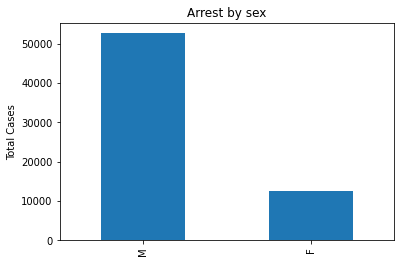

In [ ]:
data_raw_gender = data_raw[data_raw.Sex !='U']
arrest_gender = data_raw_gender.Sex.value_counts()

fig = plt.figure(figsize=(6,4))
arrest_gender.plot(kind='bar')

plt.title('Arrest by sex')
plt.ylabel('Total Cases')

plt.show()

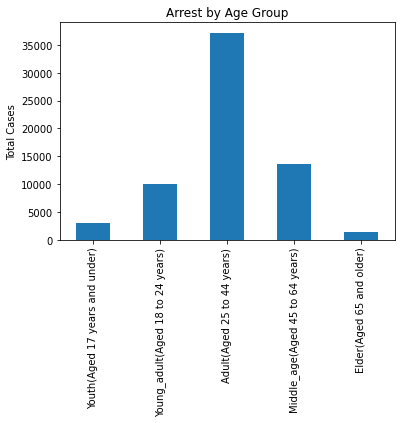

In [ ]:
data_raw_age = data_raw[data_raw.age_group !='Unknown'] 
arrest_age = data_raw_age.age_group.value_counts().reindex(index = col_index)

fig = plt.figure(figsize=(6,4))
arrest_age.plot(kind='bar')

plt.title('Arrest by Age Group')
plt.ylabel('Total Cases')

plt.show()

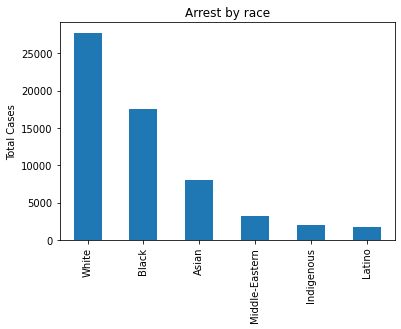

In [ ]:
data_raw_race = data_raw[data_raw.race !='Unknown or Legacy']
arrest_race = data_raw_race.race.value_counts()

fig = plt.figure(figsize=(6,4))
arrest_race.plot(kind='bar')

plt.title('Arrest by race')
plt.ylabel('Total Cases')

plt.show()

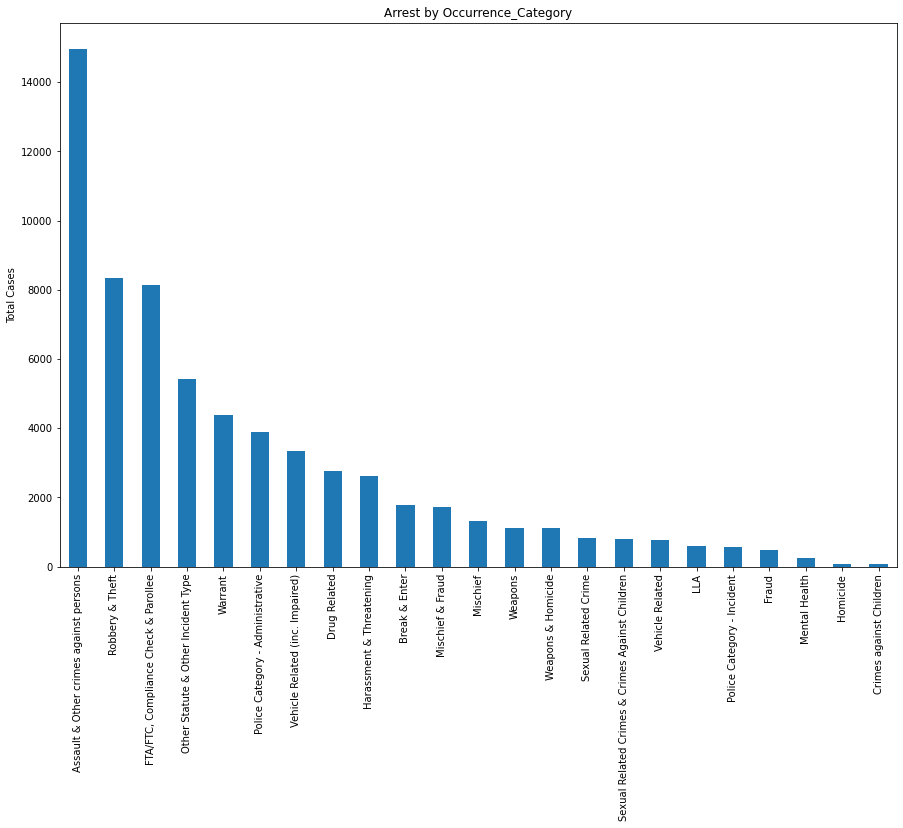

In [ ]:
data_Occ = data_raw.Occurrence_Category.value_counts()

fig = plt.figure(figsize=(15,10))
data_Occ.plot(kind='bar')

plt.title('Arrest by Occurrence_Category')
plt.ylabel('Total Cases')

plt.show()

Multivariate

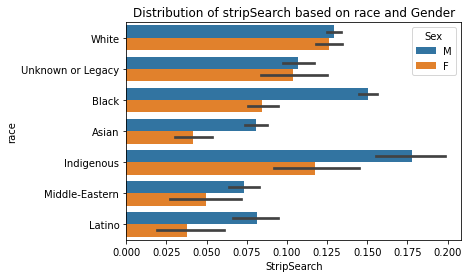

In [ ]:
sns.barplot(x="StripSearch", y="race", data= data_raw_gender,hue = "Sex")
plt.title("Distribution of stripSearch based on race and Gender")
plt.show()

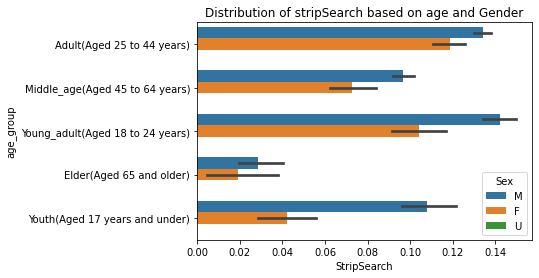

In [ ]:
sns.barplot(x="StripSearch", y="age_group", data= data_raw_age, hue = 'Sex')
plt.title("Distribution of stripSearch based on age and Gender")
plt.show()

# **Dataset**

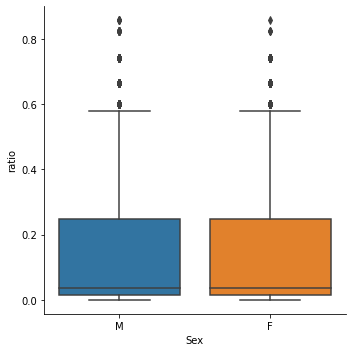

In [ ]:
dataset_s = dataset[dataset.Sex !='U']
sns.catplot(x='Sex', 
            y='ratio',
            data=dataset_s,
            kind='box')

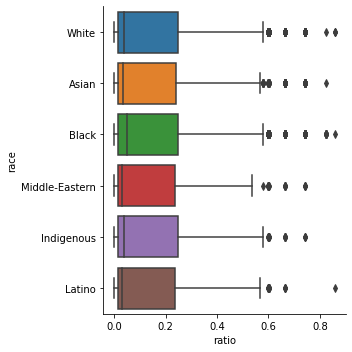

In [ ]:
dataset_r = dataset[dataset.race !='Unknown or Legacy']
sns.catplot(x='ratio', 
            y='race',
            data=dataset_r,
            kind='box')

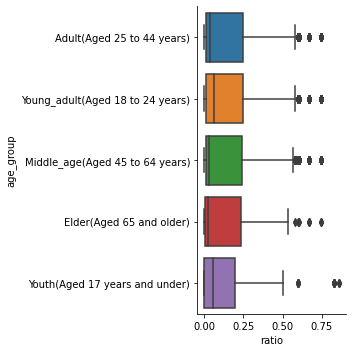

In [ ]:
dataset_a = dataset[dataset.age_group !='Unknown']
sns.catplot(x='ratio', 
            y='age_group',
            data=dataset_a,
            kind='box')

# T tests

In [ ]:
import statsmodels.stats.api as sms

In [ ]:
#degrees of freedom code for Welch test 
#code from https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/ (values checked against R output)

def welch_dof(x, y): 
    '''
    Takes in final grades for binary features
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

## Gender

In [ ]:
##Conduct Gender t-test (male, female)##
Male = dataset[dataset['Sex']=='M']
Female = dataset[dataset['Sex']=='F']

StripSearch_male = Male['ratio']
StripSearch_female = Female['ratio']

#conduct ttest
print('Ttest results for gender:',stats.ttest_ind(StripSearch_male, StripSearch_female, equal_var=False)) 

Ttest results for gender: Ttest_indResult(statistic=-2.2673278902169773, pvalue=0.023397309167640712)


In [ ]:
#calculate mean and standard deviation of groups 
print('Mean ratio of stripsearch, Male, Female:',StripSearch_male.mean(), StripSearch_female.mean())
print('Standard deviation for ratio, Male, Female:',StripSearch_male.std(), StripSearch_female.std())

Mean ratio of stripsearch, Male, Female: 0.13562751737497045 0.14185108293607662
Standard deviation for ratio, Male, Female: 0.16750818660615033 0.1699079728081248


In [ ]:
# compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(StripSearch_male), sms.DescrStatsW(StripSearch_female))
print('Confidence interval for ratio:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for ratio: (-0.010557935643091185, -0.0007668505492774104)


In [ ]:
print('DOF for ratio:',welch_dof(StripSearch_male, StripSearch_female))

DOF for ratio: 7839.996493683497


## Age_group

In [ ]:
dataset.age_group.value_counts(dropna=False)

Adult(Aged 25 to 44 years)          20566
Middle_age(Aged 45 to 64 years)      6836
Young_adult(Aged 18 to 24 years)     5327
Youth(Aged 17 years and under)       1252
Elder(Aged 65 and older)              496
Unknown                                 6
Name: age_group, dtype: int64

In [ ]:
df_age = dataset[dataset.age_group != 'Unknown']

In [ ]:
df_age.age_group.value_counts(dropna=False)

Adult(Aged 25 to 44 years)          20566
Middle_age(Aged 45 to 64 years)      6836
Young_adult(Aged 18 to 24 years)     5327
Youth(Aged 17 years and under)       1252
Elder(Aged 65 and older)              496
Name: age_group, dtype: int64

### Adult vs other age

In [ ]:
# compare adult gorup to other groups
Adult = df_age[df_age['age_group']=='Adult']
other_age1 = df_age[df_age['age_group']!='Adult']

StripSearch_Adult = Adult['ratio']
StripSearch_other_age1 = other_age1['ratio']

#conduct ttest
print('Ttest results for youth:',stats.ttest_ind(StripSearch_Adult, StripSearch_other_age1, equal_var=False))

NameError: ignored

In [ ]:
print('Mean stripsearch, youth, adult :',StripSearch_Adult.mean(), StripSearch_other_age1.mean())
print('Standard deviation for stripsearch, youth, adult:',StripSearch_Adult.std(), StripSearch_other_age1.std())

Mean stripsearch, youth, adult : 0.1362231922301639 0.1372272595852284
Standard deviation for stripsearch, youth, adult: 0.1676976662753514 0.1682259678229904


In [ ]:
# compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(StripSearch_Adult), sms.DescrStatsW(StripSearch_other_age1))
print('Confidence interval for ratio:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for ratio: (-0.004649165828241362, 0.002641031118112689)


In [ ]:
print('DOF for ratio:',welch_dof(StripSearch_Adult, StripSearch_other_age1))

DOF for ratio: 29352.923796627


### Young Adult vs other age

In [ ]:
# compare adult gorup to other groups
Young_adult = dataset[dataset['age_group']=='Young_adult']
other_age2 = dataset[dataset['age_group']!='Young_adult']

StripSearch_Young_adult = Young_adult['ratio']
StripSearch_other_age2 = other_age2['ratio']

#conduct ttest
print('Ttest results for youth:',stats.ttest_ind(StripSearch_Young_adult, StripSearch_other_age2, equal_var=False))

Ttest results for youth: Ttest_indResult(statistic=8.830078639287391, pvalue=1.3065679097557704e-18)


In [ ]:
print('Mean stripsearch, youth, adult :',StripSearch_Adult.mean(), StripSearch_other_age2.mean())
print('Standard deviation for stripsearch, youth, adult:',StripSearch_Adult.std(), StripSearch_other_age2.std())

Mean stripsearch, youth, adult : 0.1362231922301639 0.13300125391333925
Standard deviation for stripsearch, youth, adult: 0.1676976662753514 0.16553730505822106


In [ ]:
# compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(StripSearch_Adult),sms.DescrStatsW(StripSearch_other_age2))
print('Confidence interval for ratio:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for ratio: (0.0002177590147620246, 0.006226117618887734)


In [ ]:
print('DOF for ratio:',welch_dof(StripSearch_other_age2, StripSearch_Adult))

DOF for ratio: 43102.53200452768


## Race

In [ ]:
dataset.race.value_counts(dropna=False)

White                14250
Black                 9668
Asian                 3870
Unknown or Legacy     2435
Middle-Eastern        1630
Indigenous            1072
Latino                 964
Name: race, dtype: int64

In [ ]:
df_race = dataset[dataset.race!= 'Unknown or Legacy']

In [ ]:
df_race.race.value_counts()

White             14250
Black              9668
Asian              3870
Middle-Eastern     1630
Indigenous         1072
Latino              964
Name: race, dtype: int64

### White vs other race

In [ ]:
# compare white people with other race
White = df_race[df_race['race']=='White']
other_race = df_race[df_race['race'] != 'White']

StripSearch_White = White['ratio']
StripSearch_other_race = other_race['ratio']
print('Ttest results for White and Black:',stats.ttest_ind(StripSearch_White, StripSearch_other_race, equal_var=False))

Ttest results for White and Black: Ttest_indResult(statistic=3.2557000463053907, pvalue=0.0011323832826626396)


In [ ]:
#calculate mean and standard deviation of groups 
print('Mean stripsearch, White, Black:', StripSearch_White.mean(),StripSearch_other_race.mean())
print('Standard deviation for stripsearch, White, Black:', StripSearch_White.std(),StripSearch_other_race.std())

Mean stripsearch, White, Black: 0.13969059783099222 0.13349281008618594
Standard deviation for stripsearch, White, Black: 0.17006891001749777 0.16561272065793986


In [ ]:
# compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(StripSearch_White), sms.DescrStatsW(StripSearch_other_race))
print('Confidence interval for ratio:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for ratio: (0.0024665073152826556, 0.009929068174330187)


In [ ]:
print('DOF for ratio:',welch_dof(StripSearch_White, StripSearch_other_race))

DOF for ratio: 30061.969365714147


### White vs Black

In [ ]:
# compare white people with other race
White = df_race[df_race['race']=='White']
Black = df_race[df_race['race'] == 'Black']

StripSearch_White = White['ratio']
StripSearch_Black = Black['ratio']
print('Ttest results for White and Black:',stats.ttest_ind(StripSearch_White, StripSearch_Black, equal_var=False))

Ttest results for White and Black: Ttest_indResult(statistic=-1.8119667126704377, pvalue=0.07000602613126768)


In [ ]:
#calculate mean and standard deviation of groups 
print('Mean stripsearch, White, Black:', StripSearch_White.mean(),StripSearch_Black.mean())
print('Standard deviation for stripsearch, White, Black:', StripSearch_White.std(),StripSearch_Black.std())

Mean stripsearch, White, Black: 0.13969059783099222 0.14381065879109986
Standard deviation for stripsearch, White, Black: 0.17006891001749777 0.17424739806658324


In [ ]:
# compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(StripSearch_White), sms.DescrStatsW(StripSearch_other_race))
print('Confidence interval for ratio:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for ratio: (0.0024665073152826556, 0.009929068174330187)


# **One Way ANOVA**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

## Age Group

In [ ]:
# Model formula
age_model = ols('ratio ~ age_group',                 
            data = df_age).fit()
                
age_anova_result = sm.stats.anova_lm(age_model, typ=2)
print (age_anova_result)

NameError: ignored

In [ ]:
# perform Tukey's test
race_tukey = pairwise_tukeyhsd(endog= df_age['ratio'],
                          groups=df_age['age_group'],
                          alpha=0.05)

#display results
print(race_tukey)

NameError: ignored

## Race

In [ ]:
# Model formula
race_model = ols('ratio ~ race',                 
            data = df_race).fit()
                
race_anova_result = sm.stats.anova_lm(race_model, typ=2)
print (race_anova_result)

              sum_sq       df          F        PR(>F)
race        3.824085      5.0  26.758671  4.258317e-27
Residual  914.224635  31986.0        NaN           NaN


In [ ]:
# perform Tukey's test
race_tukey = pairwise_tukeyhsd(endog= df_race['ratio'],
                          groups=df_race['race'],
                          alpha=0.05)

#display results
print(race_tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
         Asian          Black   0.0214  0.001  0.0123  0.0305   True
         Asian     Indigenous   0.0153 0.0861 -0.0012  0.0317  False
         Asian         Latino  -0.0132 0.2509 -0.0304  0.0041  False
         Asian Middle-Eastern  -0.0163 0.0128 -0.0305 -0.0022   True
         Asian          White   0.0184  0.001  0.0097  0.0271   True
         Black     Indigenous  -0.0061 0.8495 -0.0215  0.0092  False
         Black         Latino  -0.0346  0.001 -0.0508 -0.0184   True
         Black Middle-Eastern  -0.0378  0.001 -0.0506 -0.0249   True
         Black          White   -0.003 0.7176 -0.0093  0.0033  False
    Indigenous         Latino  -0.0284 0.0018 -0.0496 -0.0072   True
    Indigenous Middle-Eastern  -0.0316  0.001 -0.0504 -0.0129   True
    Indigenous          White   0.

# Two-Way ANOVA

In [ ]:
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as mc

Tukey Test after Two-Way ANOVA

## Race & age

In [ ]:
df_age_race = dataset[dataset.age_group != 'Unknown']
df_age_race = df_age_race[df_age_race.race != 'Unknown or Legacy']

In [ ]:
df_age_race.groupby('age_group')['race'].value_counts(dropna=False)

age_group                         race          
Adult(Aged 25 to 44 years)        White             8888
                                  Black             5738
                                  Asian             2200
                                  Middle-Eastern     890
                                  Indigenous         736
                                  Latino             613
Elder(Aged 65 and older)          White              269
                                  Asian               84
                                  Black               76
                                  Latino              14
                                  Middle-Eastern      14
                                  Indigenous           6
Middle_age(Aged 45 to 64 years)   White             3713
                                  Black             1192
                                  Asian              817
                                  Middle-Eastern     304
                                  Indig

In [ ]:
model = ols('ratio ~ C(age_group) + C(race) + C(race):C(age_group)', data = df_age_race ).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(age_group),3.372526,4.0,29.628424,1.233407e-24
C(race),4.067972,5.0,28.590456,4.913169e-29
C(race):C(age_group),1.365106,20.0,2.398555,4.325145e-04
Residual,909.367090,31956.0,NaN,NaN


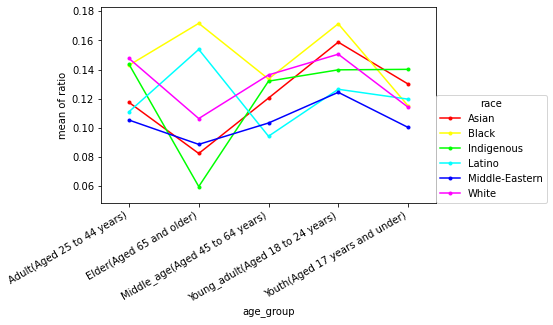

In [ ]:
fig = interaction_plot(x=df_age_race['age_group'], trace=df_age_race['race'], response=df_age_race['ratio'], legendloc = [1,0])

fig.autofmt_xdate()
plt.show()

Tukey Test after Two-Way ANOVA

In [ ]:
tukey_results = pairwise_tukeyhsd(df_age_race['ratio'], df_age_race['age_group'] + df_age_race['race'])
print(tukey_results)

                                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                                         
                    group1                                         group2                     meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------------------------------------
               Adult(Aged 25 to 44 years)Asian                Adult(Aged 25 to 44 years)Black   0.0255  0.001  0.0096  0.0413   True
               Adult(Aged 25 to 44 years)Asian           Adult(Aged 25 to 44 years)Indigenous   0.0261  0.073 -0.0008  0.0531  False
               Adult(Aged 25 to 44 years)Asian               Adult(Aged 25 to 44 years)Latino  -0.0064    0.9 -0.0353  0.0225  False
               Adult(Aged 25 to 44 years)Asian       Adult(Aged 25 to 44 years)Middle-Eastern  -0.0121    0.9 -0.0372   0.013  False
               Adult(Aged 25 to 44 years)Asian                Adult(A